# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


In Stochastic Gradient Descent (SGD), the **learning rate** () controls the size of the weight updates. Because SGD calculates gradients using only a subset of data, the optimization path is inherently "jittery."

### Impact on Convergence

The learning rate determines whether the model actually finds a minimum or fails entirely:

* **Too Low:** The model takes tiny, cautious steps. While stable, it is computationally expensive and frequently gets trapped in **saddle points** or shallow local minima because it lacks the "energy" to escape them.
* **Too High:** The updates are too aggressive. The model overshoots the optimal point and "bounces" back and forth across the loss valley. In extreme cases, the loss increases until the model **diverges** (explodes).
* **Optimal:** The model moves quickly toward the basin of the loss function and gradually slows down enough to settle into the bottom.

---

### Strategies for Adaptation

Modern training rarely uses a single fixed learning rate. Instead, practitioners use these adaptive techniques:

* **Learning Rate Schedules:** These pre-defined rules reduce the rate over time. **Cosine Annealing** is a popular choice, where the rate follows a cosine curve to start fast and end with very fine-grained updates.
* **Warm-up:** Starting with a very low rate for the first few hundred iterations before moving to the main rate. This prevents the model from diverging early on when weights are random and gradients are unstable.
* **Adaptive Optimizers (Adam/RMSProp):** These algorithms calculate a unique learning rate for every single parameter in your network. If a specific weight has a very steep gradient, the optimizer automatically scales its update down to maintain stability.
* **The LR Finder:** A diagnostic tool where you train for one epoch while exponentially increasing the rate. You pick the value where the loss decreases most rapidly, providing a data-driven starting point.

Would you like to see a code snippet of how to implement a **Cosine Annealing** scheduler in a training loop?


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [4]:
import kagglehub
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

path = kagglehub.dataset_download("quantbruce/real-estate-price-prediction")
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        y = np.array(y)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            y_pred = X @ self.theta
            grad = (1 / len(y)) * X.T @ (y_pred - y)
            self.theta -= self.lr * grad

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        y = np.array(y)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            for i in range(len(y)):
                xi = X[i]
                yi = y[i]
                self.theta -= self.lr * (xi @ self.theta - yi) * xi

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

gd = LinearRegressionGD(lr=0.01, epochs=1000)
gd.fit(X_train, y_train)
y_pred_gd = gd.predict(X_test)

sgd = LinearRegressionSGD(lr=0.01, epochs=50)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Model\t\tMSE\t\tR2")
print(f"GD\t\t{mse_gd:.4f}\t{r2_gd:.4f}")
print(f"SGD\t\t{mse_sgd:.4f}\t{r2_sgd:.4f}")

print("\nSGD Hyperparameter Experiment")
for lr, ep in [(0.1, 50), (0.01, 100), (0.001, 300)]:
    model = LinearRegressionSGD(lr=lr, epochs=ep)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(lr, ep, mean_squared_error(y_test, preds), r2_score(y_test, preds))


Using Colab cache for faster access to the 'real-estate-price-prediction' dataset.
Model		MSE		R2
GD		65.5751	0.6091
SGD		56.1923	0.6650

SGD Hyperparameter Experiment
0.1 50 244.59029134248186 -0.45797963654479834
0.01 100 56.52681559966287 0.6630489885322893
0.001 300 54.120921886939186 0.6773902938293612


# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



a) Is a Decision Tree a supervised or unsupervised learning algorithm? A Decision Tree is a supervised learning algorithm. It requires a labeled dataset to learn the relationships between input features and a target output. During training, it uses these labels to find the best way to split data into groups that are as pure as possible.

b) What is entropy in the context of decision trees? Entropy is a measure of impurity or randomness in a set of data points. In decision trees, it quantifies how mixed the class labels are within a node. If a node is perfectly "pure" (contains only one class), the entropy is 0. If the classes are evenly split, the entropy is at its maximum (1.0 for a binary classification).

c) What does reduction in entropy signify when a node is split in a decision tree? Reduction in entropy (also called Information Gain) signifies that the data has become more organized or homogeneous after the split. A high reduction means the split successfully separated the classes into more distinct groups, which is the primary goal of the tree's construction.

Numerical Calculations

1. Compute the entropy of the root node * Total points (N) = 10

Positive labels (+) = 5 (Points 2, 3, 4, 5, 6)

Negative labels (−) = 5 (Points 1, 7, 8, 9, 10)

Since the split is exactly 50/50:

E
root
​
 =−(
10
5
​
 log
2
​
  
10
5
​
 +
10
5
​
 log
2
​
  
10
5
​
 )=−(0.5×−1+0.5×−1)=1.00
2. Compute entropy for each allowed split

Split 1: (x≤−2? ) * Left (True): Point 1 only (Class: −). Entropy E
L
​
 =0.00 * Right (False): Points 2–10 (5 Positive, 4 Negative). Total = 9.

E
R
​
 =−(
9
5
​
 log
2
​
  
9
5
​
 +
9
4
​
 log
2
​
  
9
4
​
 )

log
2
​
  
9
5
​
 =log
2
​
 5−log
2
​
 9≈2.32−(2×1.58)=2.32−3.16=−0.84

log
2
​
  
9
4
​
 =log
2
​
 4−log
2
​
 9≈2.00−3.16=−1.16

E
R
​
 =−(0.56×−0.84+0.44×−1.16)=0.47+0.51≈0.98

Split 2: (x≤2? ) * Left (True): Points 1, 3, 4, 5, 6, 7, 8, 9, 10 (4 Positive, 5 Negative). Total = 9.

E
L
​
 ≈0.98 (Same 4:5 ratio as Right side of Split 1)

Right (False): Point 2 only (Class: +). Entropy E
R
​
 =0.00

Split 3: (y≤2? ) * Left (True): Points 1, 3, 4, 5, 6 (4 Positive, 1 Negative). Total = 5.

E
L
​
 =−(
5
4
​
 log
2
​
  
5
4
​
 +
5
1
​
 log
2
​
  
5
1
​
 )

log
2
​
 0.8=log
2
​
 4−log
2
​
 5=2−2.32=−0.32

log
2
​
 0.2=0−2.32=−2.32

E
L
​
 =−(0.8×−0.32+0.2×−2.32)=0.256+0.464=0.72

Right (False): Points 2, 7, 8, 9, 10 (1 Positive, 4 Negative). Total = 5.

E
R
​
 =0.72 (Same 4:1 ratio as the Left side)

3. Compute the reduction in entropy (Information Gain) Formula: IG=E
root
​
 −[(
N
N
L
​

​
 )E
L
​
 +(
N
N
R
​

​
 )E
R
​
 ]

Reduction (x≤−2): 1.00−[(
10
1
​
 ×0)+(
10
9
​
 ×0.98)]=1.00−0.88=0.12

Reduction (x≤2): 1.00−[(
10
9
​
 ×0.98)+(
10
1
​
 ×0)]=1.00−0.88=0.12

Reduction (y≤2): 1.00−[(
10
5
​
 ×0.72)+(
10
5
​
 ×0.72)]=1.00−0.72=0.28

4. Identify which split should be chosen The split (y≤2) should be chosen because it results in the maximum entropy reduction (0.28).

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


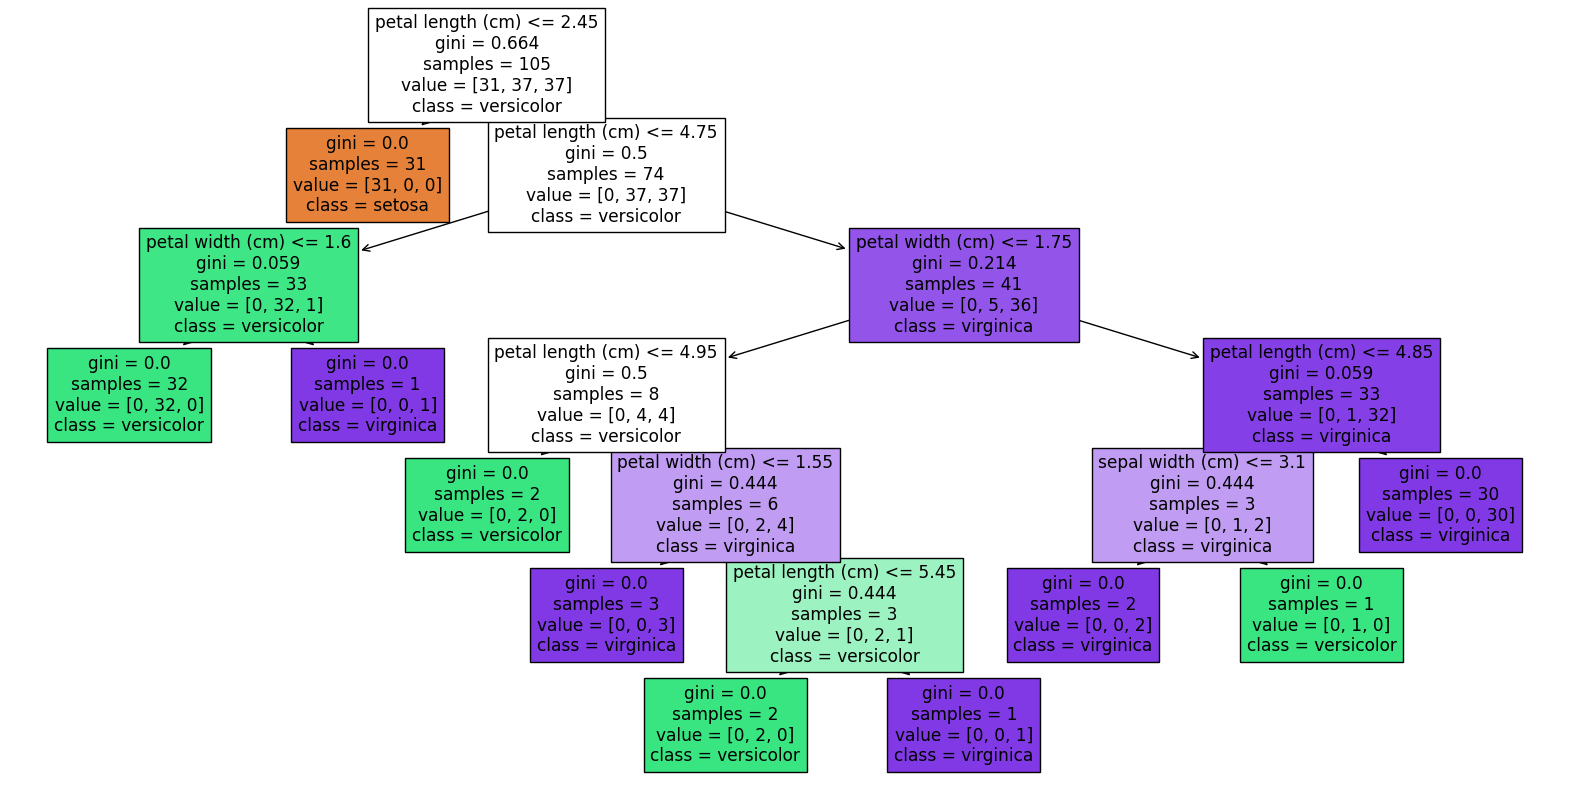

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.






*Support Vector Machine (SVM) is a supervised learning algorithm because it learns a decision boundary using labeled training data and class labels are required to compute the margin and classification error.

*The margin in SVM is the distance between the decision boundary (hyperplane) and the closest data points from each class. SVM aims to maximize the margin because a larger margin improves generalization and makes the classifier more robust to noise and unseen data.

*Support vectors are the data points that lie closest to the decision boundary or on the margin. They are important because they completely define the position and orientation of the separating hyperplane; removing other data points does not change the decision boundary.

*The purpose of a kernel function in SVM is to map data into a higher-dimensional feature space where a linear separation may be possible. This allows SVM to handle non-linearly separable data.
Two commonly used kernel functions are:
Linear kernel
Radial Basis Function (RBF) kernel




### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  


a)In a linearly separable dataset, SVM chooses the optimal separating hyperplane by maximizing the margin between the two classes while correctly classifying all training points. The hyperplane that maximizes the distance to the nearest points from both classes is selected.

b)When the data is not linearly separable, SVM introduces slack variables to allow some data points to be misclassified. This approach is called the soft-margin SVM. Additionally, SVM can use kernel functions to transform the data into a higher-dimensional space where a linear separation becomes possible.

c)The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification error.
When C is very large:
The model heavily penalizes misclassification, resulting in a smaller margin and a more complex decision boundary that may overfit the training data.
When C is very small:
The model allows more misclassifications, resulting in a larger margin and a simpler decision boundary that may underfit the data.